# Matrix Analysis 2022 - EE312
## Week 9 - Eigenvalues
[LTS2](https://lts2.epfl.ch)

## 1. RLC circuit
Let us consider a serial RLC circuit with a voltage source delivering a tension $v(t)$. A current $i(t)$ goes through the circuit. We denote by $v_R(t)$, $v_L(t)$, $v_C(t)$ the voltages in the circuit.

![RLC.png](../exercises/images/RLC.png)

Reminder: 
- $v_L(t) = L\frac{di(t)}{dt}$
- $\frac{dv_C(t)}{dt} = \frac{1}{C}i(t)$

**1.1** Using Ohm and Kirchoff laws, write the matrix first order differential equation describing the system. You can use $X(t) = \begin{pmatrix}v_C(t)\\i(t)\end{pmatrix}$.

**Answer**

We have $v(t) = v_R(t) + v_C(t) + v_L(t) = Ri(t) + v_C(t) + L\frac{di(t)}{dt}$, hence $\frac{di(t)}{dt} = \frac{v(t)}{L} - \frac{Ri(t)}{L} - \frac{v_C(t)}{L}$. The second equation is given by the relation between $v_C$ and $i$. 

Finally, using $X(t) = \begin{pmatrix}v_C(t)\\i(t)\end{pmatrix}$ :

$
\frac{dX(t)}{dt} = AX(t) + \begin{pmatrix}0\\ \frac{v(t)}{L}\end{pmatrix},
$ with $A=\begin{pmatrix}0 & \frac{1}{C}\\ -\frac{1}{L} & -\frac{R}{L}\end{pmatrix}$.

---

**1.2** What are the eigenvalues of the matrix in the equation you obtained ?

**Answer**

The charateristic polynomial of $A$ is $\lambda(\frac{R}{L}+\lambda) + \frac{1}{LC} = \lambda^2 + \frac{R}{L}\lambda + \frac{1}{LC}$. Discriminant is equal to $\frac{R^2}{L^2} - \frac{4}{LC}$. The roots of the characteristic polynomial are 

$
-\frac{R}{2L}\pm\sqrt{\begin{pmatrix}\frac{R}{2L}\end{pmatrix}^2 - \frac{1}{LC}}
$

If $\begin{pmatrix}\frac{R}{2L}\end{pmatrix}^2 - \frac{1}{LC}>0$, we have two real eigenvalues. If $\begin{pmatrix}\frac{R}{2L}\end{pmatrix}^2 - \frac{1}{LC} < 0$ the system has two complex eigenvalues, and if $\begin{pmatrix}\frac{R}{2L}\end{pmatrix}^2 - \frac{1}{LC}=0$ the system has one real eigenvalue with a multiplicity of 2.

---

**1.3** Assuming $v(t) = 0$ and $X(0) = X_0$, compute $X(t)$

**Answer** $X(t) = X_0e^{At}$.

---

**1.4** Let us use fixed $L$ and $C$ values. For which values of $R$ do we have real or complex eigenvalues ? Compute the limit value of $R$ for $L=40mH$ and $C=10nF$.

**Answer** Complex eigenvalues mean that $\begin{pmatrix}\frac{R}{2L}\end{pmatrix}^2 - \frac{1}{LC} < 0$, i.e. $R<R_L=2\sqrt{\frac{L}{C}}$. With the supplied values, $R_L = 4k\Omega$.

---

**1.5** Using $X_0=\begin{pmatrix}1.5\\ 10^{-3}\end{pmatrix}$ as initial conditions and (at least) two carefully chosen values of $R$, compute the solutions $v_C(t)$ and $i(t)$ and plot them. Be careful when computing and plotting the solutions, make sure you use the appropriate time range ! (hint: checking the value of the imaginary part of the eigenvalues might help). Discuss the different cases (do not forget the case $R=R_L$).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

**Answer** In order to select a proper timescale to observe the evolution of the system, let us consider the case where the eigenvalues are complex, i.e. $R<4k\Omega$. If we have $\lambda = \lambda_{re} + i\lambda_{im}$, the solution of the system will involve $e^{t\lambda}=e^{t\lambda_{re}}e^{it\lambda_{im}}$. The second term can be rewritten as $\cos(t\lambda_{im}) + i\sin(t\lambda_{im})$. The response of the system will then contain a perdiodic term of frequency $f_c = \frac{1}{2\pi}\sqrt{\begin{pmatrix}\frac{R}{2L}\end{pmatrix}^2 - \frac{1}{LC}}$.
The term in $\lambda_{re} = -\frac{R}{2L}<0$, will attenuate the amplitude of the response.

Let us use $R=400\Omega$, this yields $f_c \approx 7.9 kHz$, or a period ca. $126\mu s$. Computing the response with a resolution of $10 \mu s$ will be sufficient.

In the case where the two eigenvalues are real ($R>4k\Omega$), the circuit does not have an oscillating component and the energy present in the system at $t=0$ dissipates without oscillation. The case $R=R_L$ falls also in this category, but voltage returns to 0 faster than for other values of $R$ (system "critically damped").

In [147]:
L = 4e-2
C = 1e-8
R1 = 400

In [131]:
fc1 = np.sqrt(np.abs((R1/(2*L))**2 - 1/(L*C)))/(2*np.pi)
print(fc1)

7705.055550768748


In [132]:
1/fc1

0.00012978491763115558

In [133]:
np.linalg.eig(RLC1)

(array([-5000.+49749.37185533j, -5000.-49749.37185533j]),
 array([[ 9.99999875e-01+0.j        ,  9.99999875e-01-0.j        ],
        [-4.99999938e-05+0.00049749j, -4.99999938e-05-0.00049749j]]))

In [159]:
RLC1 = np.array([[0, 1/C], [-1/L, -R1/L]])
X0 = np.array([1.5, 0.001])

In [160]:
t = np.arange(0, 200e-5, 1e-6)
Y = np.zeros((2,t.size))
for k in range(len(t)):
    Y[:,k]=expm(t[k]*RLC1)@X0

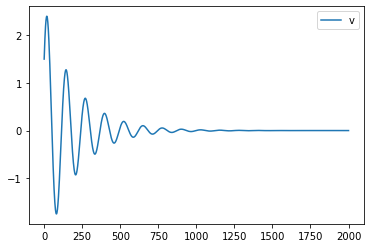

In [161]:
plt.plot(Y[0, :])
plt.legend('vc')

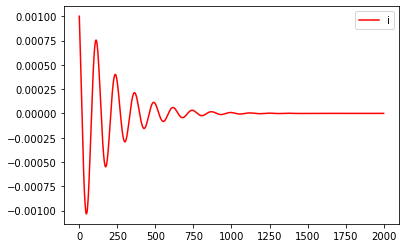

In [162]:
plt.plot(Y[1, :], 'r')
plt.legend('i')

If we check the overdamped regime, using e.g. $R=10k\Omega$

In [155]:
R2= 10000
RLC2 = np.array([[0, 1/C], [-1/L, -R2/L]])

In [156]:
np.linalg.eig(RLC2)

(array([ -10435.6076261, -239564.3923739]),
 array([[ 9.99999995e-01, -9.99997130e-01],
        [-1.04356076e-04,  2.39563705e-03]]))

In [163]:
t = np.arange(0, 200e-5, 1e-5)
Y2 = np.zeros((2,t.size))
for k in range(len(t)):
    Y2[:,k]=expm(t[k]*RLC2)@X0

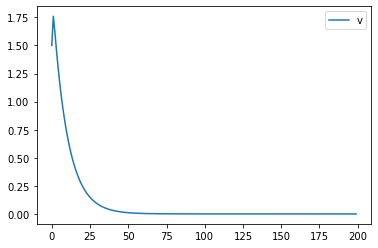

In [164]:
plt.plot(Y2[0, :])
plt.legend('vc')

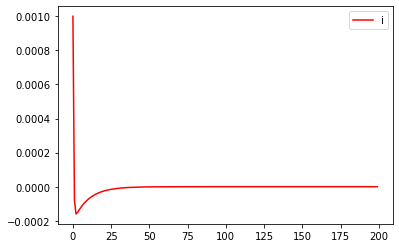

In [165]:
plt.plot(Y2[1, :], 'r')
plt.legend('i')

In [166]:
R3= 4000
RLC3 = np.array([[0, 1/C], [-1/L, -R3/L]])

In [167]:
np.linalg.eig(RLC3)

(array([-50000.+0.00080203j, -50000.-0.00080203j]),
 array([[ 9.99999875e-01+0.00000000e+00j,  9.99999875e-01-0.00000000e+00j],
        [-4.99999938e-04+8.02032201e-12j, -4.99999938e-04-8.02032201e-12j]]))

In [168]:
t = np.arange(0, 200e-5, 1e-5)
Y3 = np.zeros((2,t.size))
for k in range(len(t)):
    Y3[:,k]=expm(t[k]*RLC3)@X0

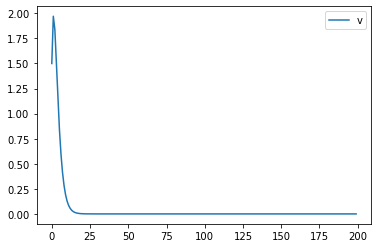

In [169]:
plt.plot(Y3[0, :])
plt.legend('vc')

## 2. Dynamics of opinion diffusion

Consider the dynamics of opinion diffusion among $N$ people sitting in a ring-shaped structure. Each individual is connected to her two nearest neighbors (i.e., left and right). Initially they have random opinions (represented as random real numbers), but at every time step, each individual changes his opinion depending on the social neighborhood. If we denote by $x_p(k)$ the value of the $p$-th individual at time step $k$, we will consider the following update rule:

$x_p(k+1) = (1 - 2\alpha)x_p(k) + \alpha(x_{p-1}(k) + x_{p+1}(k))$, $\alpha$ being a real-valued parameter.

Let us denote by $X(k) = \begin{pmatrix}x_1(k)\\x_2(k)\\ \vdots \\ x_N(k)\end{pmatrix}$.

**2.1** Write $X(k+1)$ as a function of $X(k)$ and as a function of X(0).

**Answer** 
$X(k+1)= AX(k) = 
\begin{pmatrix}
1 - 2\alpha & \alpha & 0 & ... &0 & 0 & \alpha \\
\alpha & 1 - 2\alpha & \alpha  & ... & 0 & 0 & 0 \\
\vdots & \vdots & \vdots &  & \vdots \\
0 & 0 & 0 & ... & \alpha & 1 - 2\alpha & \alpha \\
\alpha & 0 & 0 & ... & 0 & 1 - 2\alpha & \alpha \\
\end{pmatrix}X(k)$

$X(k+1) = A^kX(0)$.

---

**2.2** Using a vector containing $N$ random values for $X(0)$ implement a function that computes $X(k)$. Make sure you use as few matrix multiplications as possible (hint: [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) might help).

In [195]:
def update_matrix(N, alpha): # return the matrix that is used to compute X(k+1) from X(k)
    A = (1 - 2*alpha)*np.eye(N)
    A[0, 1] = alpha
    A[0, N-1] = alpha
    for k in np.arange(1, N-1):
        A[k, k-1] = alpha
        A[k, k+1] = alpha
    A[N-1, N-2] = alpha
    A[N-1, 0] = alpha
    return A

def compute_opinions(x0, update_matrix, num_steps):
    eig_val, eig_vec = np.linalg.eig(update_matrix)
    upk = eig_vec@np.diag(np.power(eig_val, num_steps))@np.linalg.inv(eig_vec)
    return upk@x0

In [199]:
update_matrix(6, 0.25)

array([[0.5 , 0.25, 0.  , 0.  , 0.  , 0.25],
       [0.25, 0.5 , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.5 , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.5 , 0.25],
       [0.25, 0.  , 0.  , 0.  , 0.25, 0.5 ]])

In [198]:
compute_opinions(0.5*np.ones(6) + 0.2*np.random.rand(6), update_matrix(6, 0.25), 50)

array([0.5881895 , 0.58818952, 0.5881895 , 0.58818947, 0.58818945,
       0.58818946])

**2.3** What are the eigenvalues of the matrix of the system ?

Hint: This result about circulant matrices might be helpful:

A $n\times n$ circulant matrix $C$ defined by:

$C = \begin{pmatrix}
c_0 & c_{n-1} & ... & c_2 & c_1\\
c_1 & c_0 & c_{n-1} & ... & c_1\\
\vdots & \vdots & ... & & \vdots\\
c_{n-1} & c_{n-2} & ... & c_1 & c_0
\end{pmatrix}$

has its eigenvalues defined by:

$\lambda_k = c_0 + c_{n-1}\omega^k + c_{n-2}\omega^{2k} + ... + c_1\omega^{k(n-1)}, k=0, 1, ..., n-1$ and $\omega=e^{\frac{2i\pi}{n}}$. 

**Answer**

Given the property of the eigenvalues of a circulant matrix ($A$ is clearly one), we have:

$\lambda_k = (1-2\alpha) + \alpha e^{\frac{2ik\pi}{n}} + \alpha e^{(n-1)\frac{2ik\pi}{n}}$.

The last term's exponential can be expanded: $e^{(n-1)\frac{2ik\pi}{n}} = e^{2ik\pi}e^{-\frac{2ik\pi}{n}} = e^{-\frac{2ik\pi}{n}}$. Therefore:

$\lambda_k = (1-2\alpha) + \alpha (e^{\frac{2ik\pi}{n}} + e^{-\frac{2ik\pi}{n}}) = (1-2\alpha) + 2\alpha\cos\left(\frac{2k\pi}{n}\right)$.

The matrix $A$ eigenvalues are all real.

In [224]:
def eigvals(N, alpha):
    ev = np.zeros(N)
    for k in range(N):
        ev[k] = (1-2*alpha) + 2*alpha*np.cos(2*k*np.pi/N)
    return ev

**2.4** Implement a function that returns all opinion values, i.e. a vector $\begin{pmatrix}X(0)\\ X(1)\\ X(2)\\ \vdots\\ X(p)\end{pmatrix}$. Plot the evolution of the opinion values. Choose a small value of $N$ (e.g. 5 or 6) and consider $\alpha\in[-\frac{1}{2}, \frac{1}{2}]$. How many different behaviors can you identify ? How do they relate to the eigenvalues of the update matrix ? 

**Answer**

In [204]:
def compute_opinions_evol(x0, update_matrix, num_steps):
    res = np.zeros((num_steps+1, len(x0)))
    res[0, :] = x0
    xp = x0
    for k in range(num_steps):
        xn = update_matrix@xp
        res[k+1, :] = xn
        xp = xn
    return res

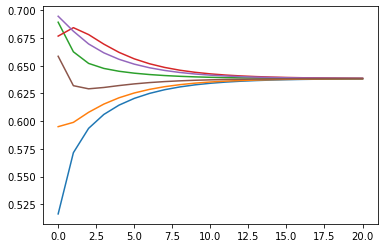

In [207]:
res = compute_opinions_evol(0.5*np.ones(6) + 0.2*np.random.rand(6), update_matrix(6, 0.25), 20)
for k in range(6):
    plt.plot(res[:, k])

In [221]:
np.linalg.eig(update_matrix(4, 0.45))

(array([-0.8,  1. ,  0.1,  0.1]),
 array([[ 5.00000000e-01, -5.00000000e-01, -7.07106781e-01,
          3.00068107e-17],
        [-5.00000000e-01, -5.00000000e-01, -8.49716416e-17,
         -7.07106781e-01],
        [ 5.00000000e-01, -5.00000000e-01,  7.07106781e-01,
         -3.00068107e-17],
        [-5.00000000e-01, -5.00000000e-01,  6.06099717e-17,
          7.07106781e-01]]))

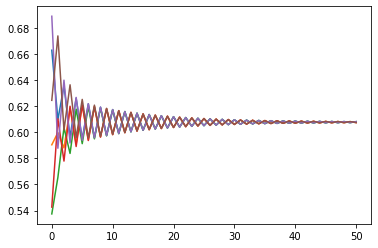

In [214]:
res = compute_opinions_evol(0.5*np.ones(6) + 0.2*np.random.rand(6), update_matrix(6, 0.48), 50)
for k in range(6):
    plt.plot(res[:, k])

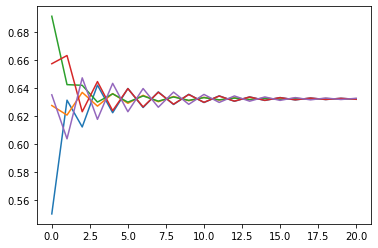

In [239]:
res = compute_opinions_evol(0.5*np.ones(5) + 0.2*np.random.rand(5), update_matrix(5, 0.5), 20)
for k in range(5):
    plt.plot(res[:, k])

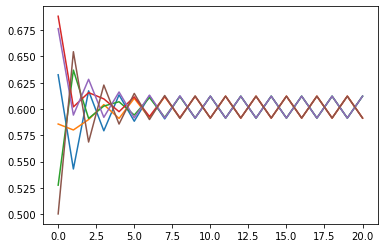

In [240]:
res = compute_opinions_evol(0.5*np.ones(6) + 0.2*np.random.rand(6), update_matrix(6, 0.5), 20)
for k in range(6):
    plt.plot(res[:, k])

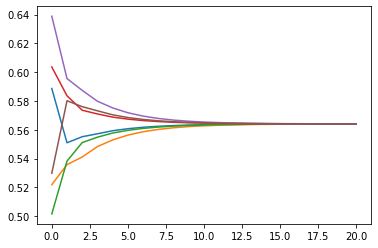

In [228]:
res = compute_opinions_evol(0.5*np.ones(6) + 0.2*np.random.rand(6), update_matrix(6, 0.3), 20)
for k in range(6):
    plt.plot(res[:, k])

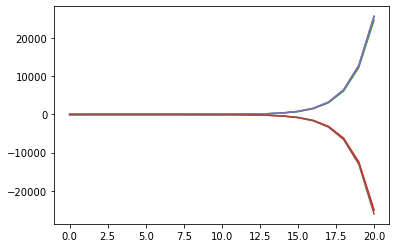

In [211]:
res = compute_opinions_evol(0.5*np.ones(6) + 0.2*np.random.rand(6), update_matrix(6, -0.25), 20)
for k in range(6):
    plt.plot(res[:, k])

The case $\alpha=0$ is trivial. The bounds of the eigenvalues are fairly simple, as the cosine is between -1 and 1, the eigenvalues are between 1 and $1-4\alpha$. As soon as $alpha<0$ we will have eigenvalues greater than 1.

When $\alpha$ is positive we have $\lambda_k\leq 1$ and the system converges to a stable solution where all point have an equal value (i.e. inside the space associated to eigenvalue 1). However when $\alpha$ increases, we have more negative eigenvalues which cause oscillations. When $\alpha = \frac{1}{2}$, -1 becomes an eigenvalue (when $n$ is even) and the system produces oscillating solutions. In terms of opinion it means the current individual takes the compelete opposite opinion of its neighbors. 

When $\alpha <0$, the eigenvalues become greater then 1 and the opinions diverge.